##**SHETH L.U.J. COLLEGE OF ARTS & SIR M.V. COLLEGE OF SCIENCE & COMMERCE**

**Aim: Feed Forward Backpropagation Neural Network**

* Implement the Feed Forward Backpropagation algorithm to train a neural
network.
* Use a given dataset to train the neural network for a specific task.
* Evaluate the performance of the trained network on test data.

### **Bhumika Shelar | T114**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error # Added mean_squared_error
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

In [ ]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="WineClass")

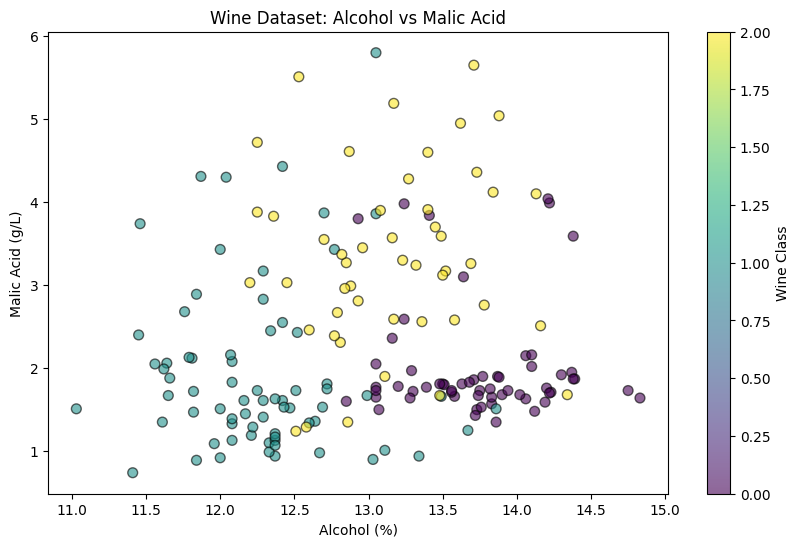

In [ ]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    X['alcohol'],        # Feature 1
    X['malic_acid'],     # Feature 2
    c=y,                 # Color by wine class
    cmap='viridis',
    alpha=0.6,
    edgecolor='k',
    s=50
)

plt.colorbar(scatter, label='Wine Class')
plt.xlabel('Alcohol (%)')
plt.ylabel('Malic Acid (g/L)')
plt.title('Wine Dataset: Alcohol vs Malic Acid')
plt.show()

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y.head()

,WineClass
0,0
1,0
2,0
3,0
4,0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [ ]:
input_size = X_train.shape[1]  # 8 features
hidden_size = 5
output_size = 1
learning_rate = 0.01
epochs = 500

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

activation = relu
activation_derivative = relu_derivative

In [ ]:
#Training Loop
loss_history = []

for epoch in range(epochs):
    # Forward Propagation
    Z1 = np.dot(X_train, W1) + b1
    A1 = activation(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = Z2

    # Loss (MSE)
    loss = np.mean((y_train - y_pred) ** 2)
    loss_history.append(loss)

    # Backward Propagation
    dZ2 = 2 * (y_pred - y_train) / y_train.shape[0]
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * activation_derivative(Z1)
    dW1 = np.dot(X_train.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update Weights and Biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # Progress output
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

Epoch 50/500, Loss: 0.5923
Epoch 100/500, Loss: 0.3750
Epoch 150/500, Loss: 0.3037
Epoch 200/500, Loss: 0.2642
Epoch 250/500, Loss: 0.2394
Epoch 300/500, Loss: 0.2215
Epoch 350/500, Loss: 0.2075
Epoch 400/500, Loss: 0.1959
Epoch 450/500, Loss: 0.1855
Epoch 500/500, Loss: 0.1763


In [ ]:
Z1_test = np.dot(X_test, W1) + b1
A1_test = activation(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
y_test_pred = Z2_test  # Raw output (before argmax)

# Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"\nMean Squared Error on Test Data: {mse:.4f}")


Mean Squared Error on Test Data: 0.1863


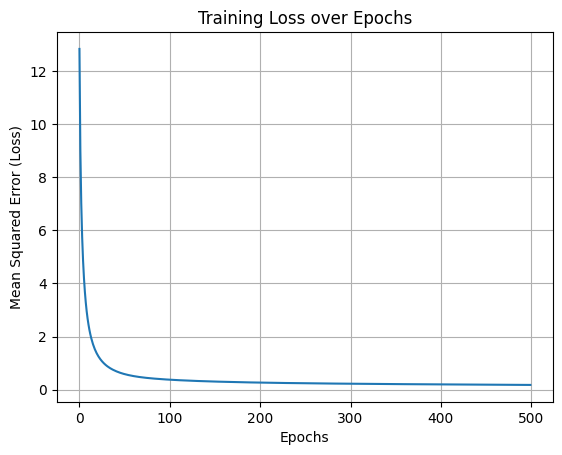

In [ ]:
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()